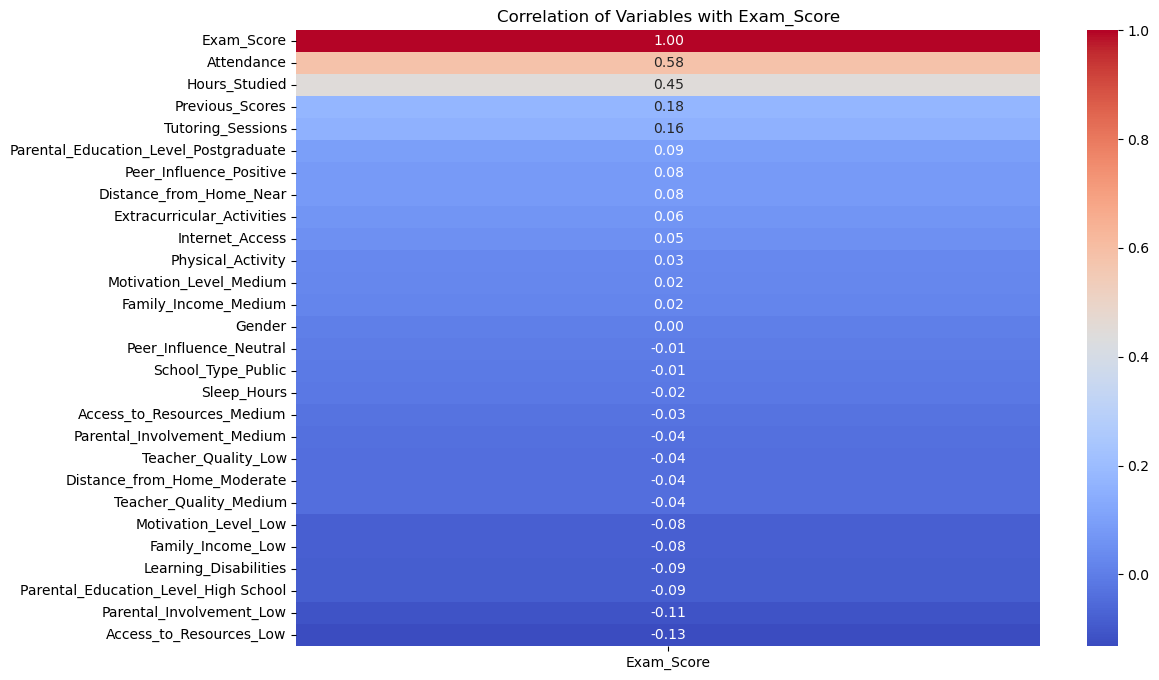

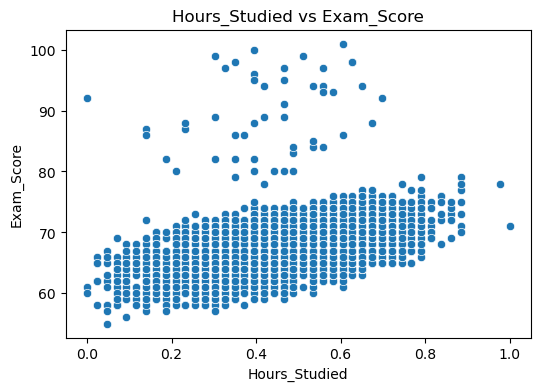

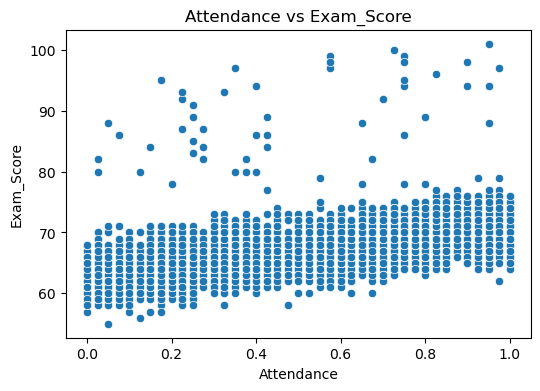

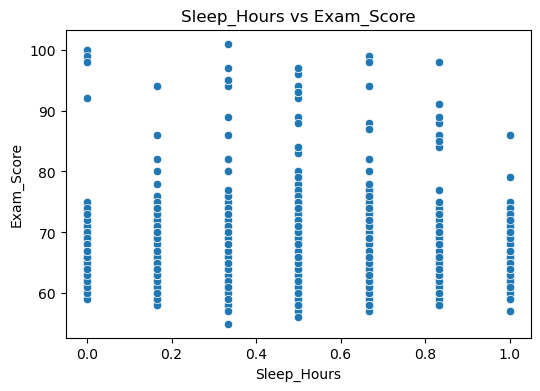

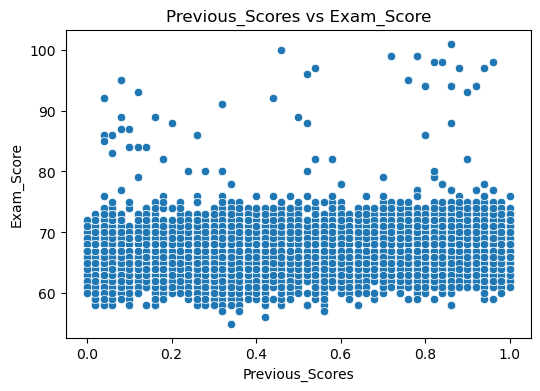

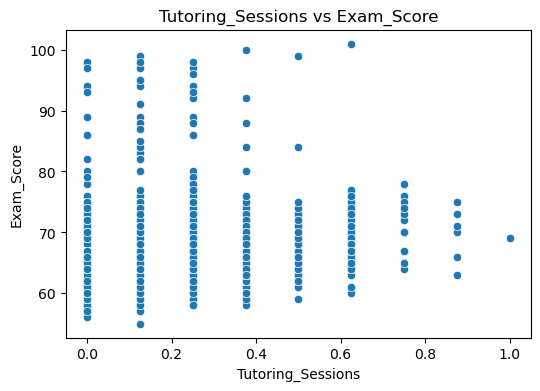

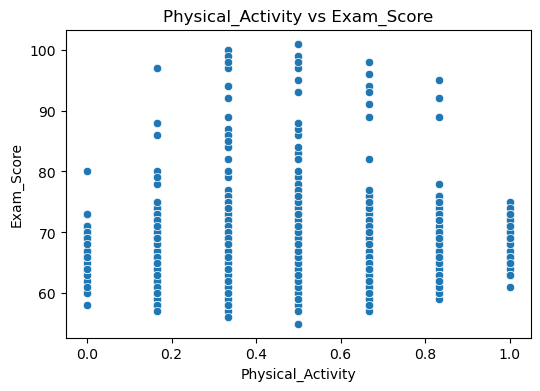

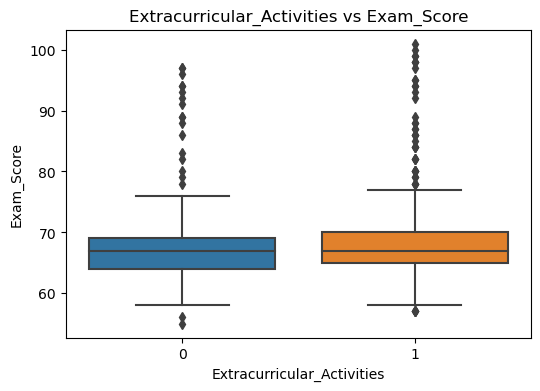

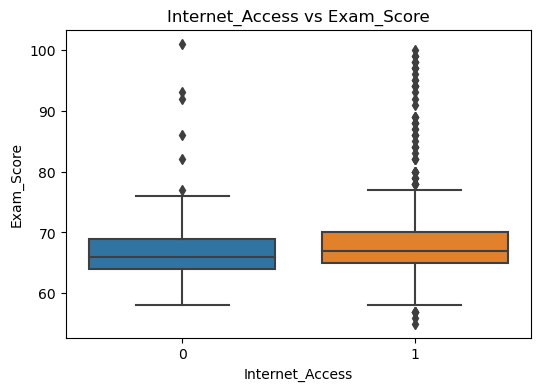

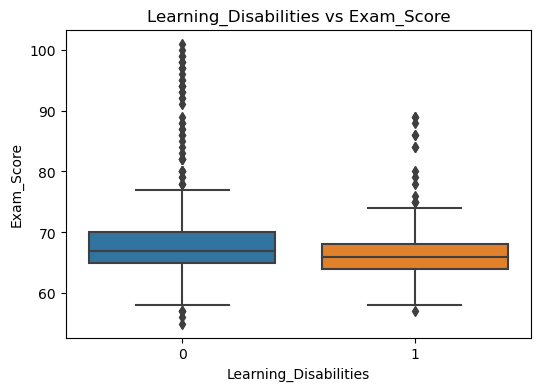

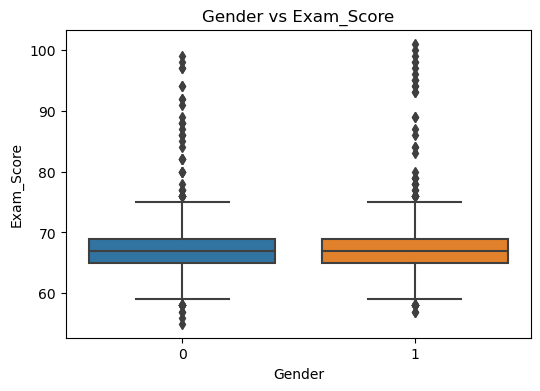

Feature Importance Analysis:
                                  Feature  Importance
1                              Attendance    0.382619
0                           Hours_Studied    0.240712
4                         Previous_Scores    0.090990
6                       Tutoring_Sessions    0.037418
7                       Physical_Activity    0.027355
3                             Sleep_Hours    0.026713
10               Parental_Involvement_Low    0.020549
12                Access_to_Resources_Low    0.017614
13             Access_to_Resources_Medium    0.012028
24  Parental_Education_Level_Postgraduate    0.010898
8                   Learning_Disabilities    0.010165
22                Peer_Influence_Positive    0.010121
11            Parental_Involvement_Medium    0.009611
2              Extracurricular_Activities    0.009417
16                      Family_Income_Low    0.008891
26                Distance_from_Home_Near    0.008851
19                 Teacher_Quality_Medium    0.008737

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


data = pd.read_csv('StudentPerformanceFactors.csv')

# Step 1: Data Cleaning
# Impute missing values with mode for categorical columns
categorical_cols_with_missing = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for col in categorical_cols_with_missing:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Step 2: Encode Categorical Variables
# Use one-hot encoding for variables with more than two categories
data_encoded = pd.get_dummies(data, columns=[
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home'
], drop_first=True)

# Label encode binary variables
binary_mappings = {
    'Extracurricular_Activities': {'No': 0, 'Yes': 1},
    'Internet_Access': {'No': 0, 'Yes': 1},
    'Learning_Disabilities': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 0, 'Female': 1}
}
data_encoded.replace(binary_mappings, inplace=True)

# Normalize numerical variables for consistency
scaler = MinMaxScaler()
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                  'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Step 3: Exploratory Data Analysis
# Correlation heatmap
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Exam_Score']].sort_values(by='Exam_Score', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Variables with Exam_Score')
plt.show()

# Scatter plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data_encoded[col], y=data_encoded['Exam_Score'])
    plt.title(f'{col} vs Exam_Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.show()

# Boxplots for binary features
binary_features = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities', 'Gender']
for col in binary_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data_encoded[col], y=data_encoded['Exam_Score'])
    plt.title(f'{col} vs Exam_Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.show()

# Step 4: Analyze Influence of Variables
# Split data into features and target
X = data_encoded.drop(columns=['Exam_Score'])
y = data_encoded['Exam_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance Analysis:")
print(feature_importances)

# Evaluate model performance
y_pred = rf_model.predict(X_test)
model_performance = r2_score(y_test, y_pred)
print(f"\nModel R^2 Score: {model_performance:.3f}")


In [5]:
pip install causalgraphicalmodels

     -------------------------------------- 47.1/47.1 kB 131.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install dowhy

     ------------------------------------ 383.4/383.4 kB 341.4 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 946.7 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 921.0 kB/s eta 0:00:00
     -------------------------------------- 174.5/174.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pgmpy

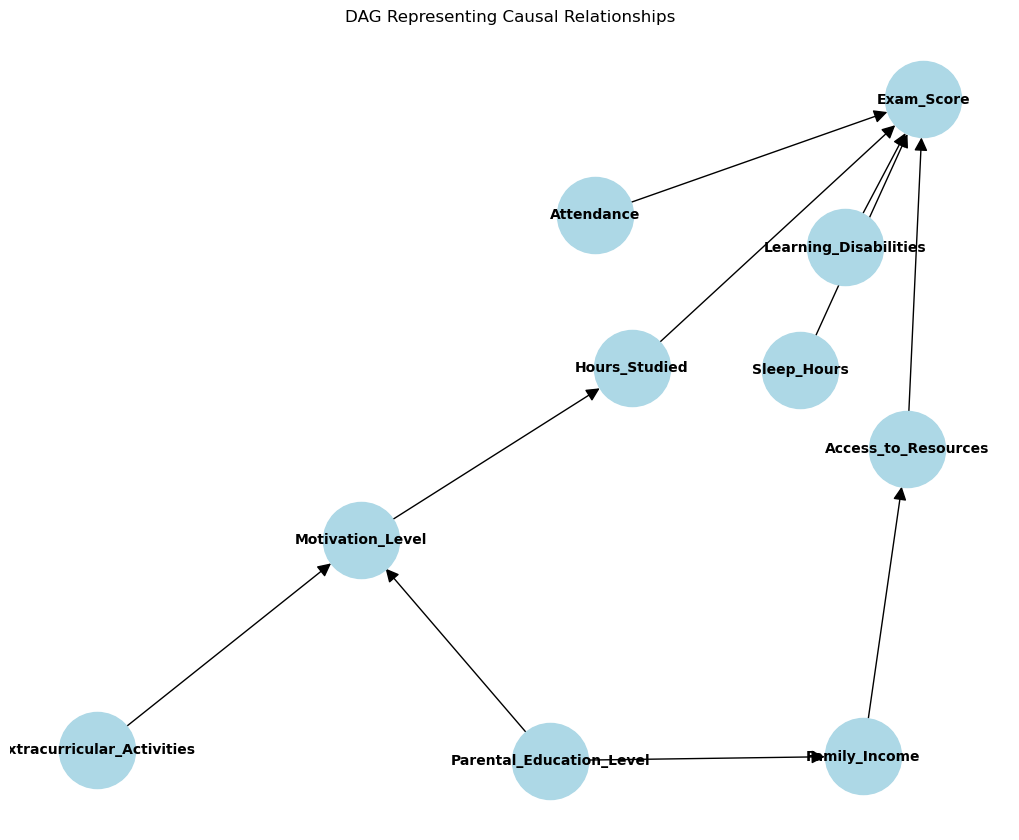

In [3]:
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt


model = BayesianNetwork([
    ('Parental_Education_Level', 'Motivation_Level'),
    ('Parental_Education_Level', 'Family_Income'),
    ('Family_Income', 'Access_to_Resources'),
    ('Access_to_Resources', 'Exam_Score'),
    ('Motivation_Level', 'Hours_Studied'),
    ('Hours_Studied', 'Exam_Score'),
    ('Attendance', 'Exam_Score'),
    ('Sleep_Hours', 'Exam_Score'),
    ('Extracurricular_Activities', 'Motivation_Level'),
    ('Learning_Disabilities', 'Exam_Score')
])


graph = nx.DiGraph()
graph.add_nodes_from(model.nodes())
graph.add_edges_from(model.edges())


plt.figure(figsize=(10, 8))
nx.draw(
    graph,
    with_labels=True,
    node_size=3000,
    node_color='lightblue',
    font_size=10,
    font_weight="bold",
    arrowsize=20
)
plt.title("DAG Representing Causal Relationships")
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Define Structural Equations for SCM
def generate_scm_data(n=1000):
    np.random.seed(42)

    # Exogenous noise variables
    epsilon_resources = np.random.normal(0, 1, n)
    epsilon_motivation = np.random.normal(0, 1, n)
    epsilon_hours = np.random.normal(0, 1, n)
    epsilon_exam = np.random.normal(0, 1, n)

    # Structural Equations
    parental_education = np.random.choice([0, 1, 2], size=n)  
    family_income = 3000 + 1000 * parental_education + np.random.normal(0, 500, n)
    access_to_resources = 0.5 + 0.0001 * family_income + epsilon_resources
    extracurricular = np.random.choice([0, 1], size=n)  
    motivation_level = 0.3 * parental_education + 0.4 * extracurricular + epsilon_motivation
    sleep_hours = np.random.uniform(5, 10, size=n)
    hours_studied = 2 * motivation_level + 0.5 * sleep_hours + epsilon_hours
    attendance = np.random.uniform(50, 100, size=n)
    learning_disabilities = np.random.choice([0, 1], size=n)  
    exam_score = (
        10 * hours_studied
        + 5 * access_to_resources
        + 0.3 * attendance
        - 20 * learning_disabilities
        + epsilon_exam
    )

    # Combine into a DataFrame
    data = pd.DataFrame({
        "Parental_Education_Level": parental_education,
        "Family_Income": family_income,
        "Access_to_Resources": access_to_resources,
        "Motivation_Level": motivation_level,
        "Hours_Studied": hours_studied,
        "Sleep_Hours": sleep_hours,
        "Attendance": attendance,
        "Extracurricular_Activities": extracurricular,
        "Learning_Disabilities": learning_disabilities,
        "Exam_Score": exam_score
    })
    return data


data = generate_scm_data()

# Step 2: Adjust for Confounders and Analyze Relationships
X = data[["Hours_Studied", "Access_to_Resources", "Attendance", "Learning_Disabilities"]]
y = data["Exam_Score"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Causal Effect Analysis (Linear Model):")
print(f"Intercept: {model.intercept_}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"R^2 Score: {r2_score(y, y_pred):.3f}")

# Step 3: Simulate Interventions
# Simulating an intervention: Increase Hours_Studied by 5 hours
data_intervened = data.copy()
data_intervened["Hours_Studied"] += 5

# Predict new Exam Scores after intervention
y_intervened_pred = model.predict(data_intervened[["Hours_Studied", "Access_to_Resources", "Attendance", "Learning_Disabilities"]])

print("\nSimulating Intervention:")
print(f"Average Exam Score Before Intervention: {data['Exam_Score'].mean():.2f}")
print(f"Average Exam Score After Intervention: {y_intervened_pred.mean():.2f}")

# Step 4: Causal Effect Estimation Using Do-Calculus
# P(Exam_Score | do(Hours_Studied = 10))

data_do_hours = data.copy()
data_do_hours["Hours_Studied"] = 10
y_do_hours_pred = model.predict(data_do_hours[["Hours_Studied", "Access_to_Resources", "Attendance", "Learning_Disabilities"]])

print("\nDo-Calculus Intervention (Hours_Studied = 10):")
print(f"Average Exam Score After Setting Hours_Studied to 10: {y_do_hours_pred.mean():.2f}")


Causal Effect Analysis (Linear Model):
Intercept: 0.34225365409452024
Hours_Studied: 9.99
Access_to_Resources: 4.99
Attendance: 0.30
Learning_Disabilities: -20.08
R^2 Score: 0.999

Simulating Intervention:
Average Exam Score Before Intervention: 65.58
Average Exam Score After Intervention: 115.51

Do-Calculus Intervention (Hours_Studied = 10):
Average Exam Score After Setting Hours_Studied to 10: 116.54


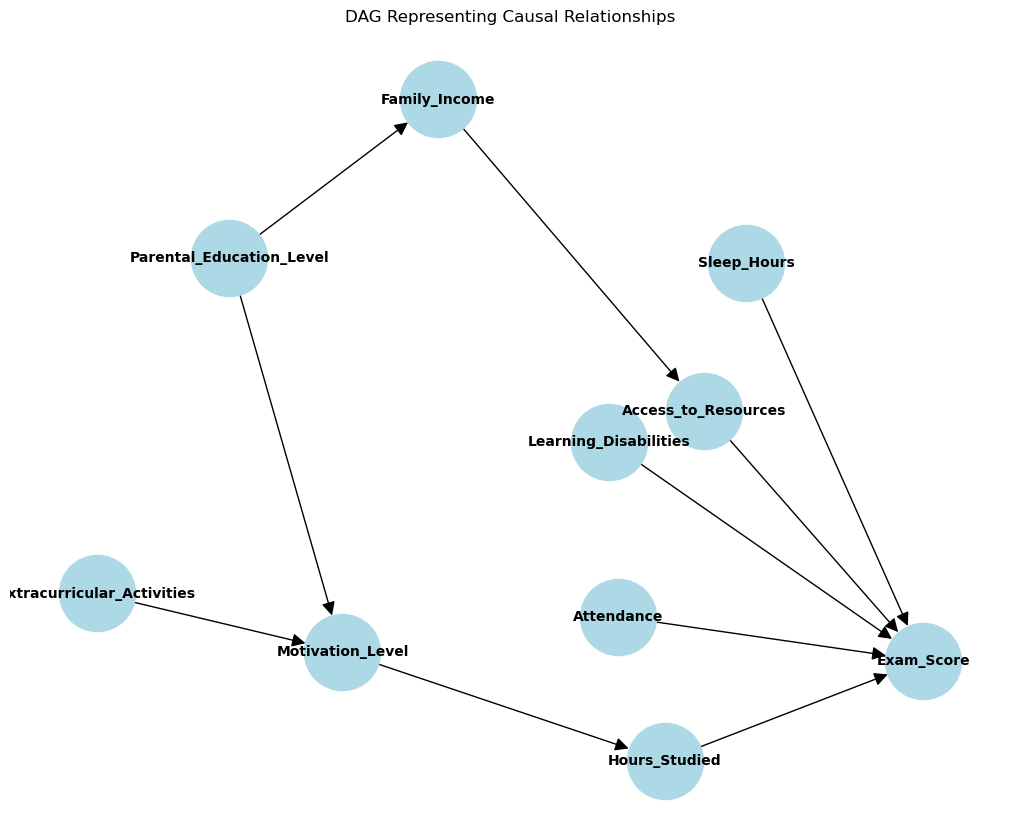